In [1]:
import pandas as pd

# Load dataset
file_path = "Housing.csv"
df = pd.read_csv(file_path)

print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [2]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Features & Target
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)

MAE: 970043.403920164
MSE: 1754318687330.6643
R²: 0.6529242642153184


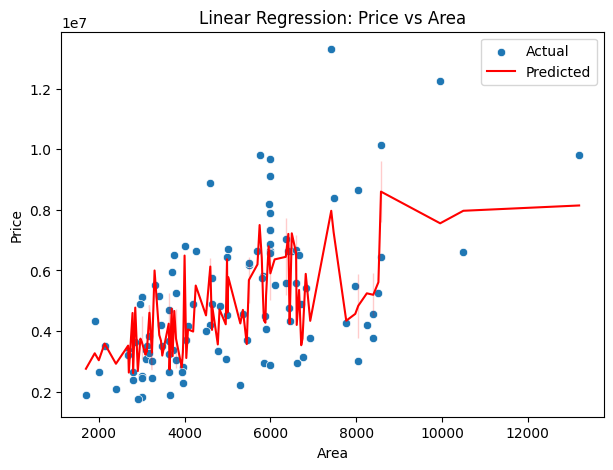

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_test["area"], y=y_test, label="Actual")
sns.lineplot(x=X_test["area"], y=y_pred, color="red", label="Predicted")
plt.title("Linear Regression: Price vs Area")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.show()

In [7]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coefficients.head(10))

                Feature   Coefficient
2             bathrooms  1.094445e+06
9   airconditioning_yes  7.914267e+05
8   hotwaterheating_yes  6.846499e+05
10         prefarea_yes  6.298906e+05
3               stories  4.074766e+05
7          basement_yes  3.902512e+05
5          mainroad_yes  3.679199e+05
6         guestroom_yes  2.316100e+05
4               parking  2.248419e+05
1              bedrooms  7.677870e+04
